<a href="https://colab.research.google.com/github/singhsourav0/Instagram-captions-generator/blob/main/insta_caption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image
import google.generativeai as genai
import base64
import io
import json
import mimetypes
import pathlib
import pprint
import requests
import textwrap
import PIL.Image
import IPython.display

from IPython.display import display
from IPython.display import Markdown
from google.colab import userdata

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
Gemmodel = genai.GenerativeModel('gemini-pro')


from google.colab import userdata
API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=API_KEY)

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

def predict_step(image_paths):
  images = []
  for image_path in [image_paths]:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")
    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)
  output_ids = model.generate(pixel_values, **gen_kwargs)
  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

def GenerateOutput(image_path, mood_category):
    generated_text = predict_step(image_path)
    prompt = f"write captions for instagram with emoji and hashtag. The photo is described as {generated_text[0]} if i my mood is described as {mood_category}";
    response = Gemmodel.generate_content(prompt)
    return to_markdown(response.text)

# GenerateOutput("/content/anushkaSen.png", "happy")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

In [ ]:
GenerateOutput("/content/features-life-style.jpg", "sad")


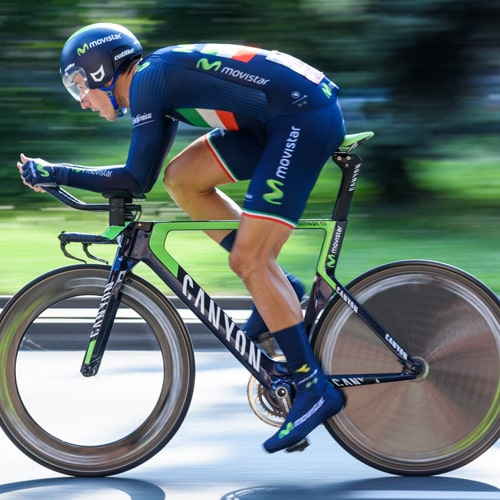

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


> 1. 🚴‍♂️💨 Cruising through the streets with a smile on my face. #BikingBliss #HappyVibes
> 
> 
> 2. 😎🚲 Life is better on two wheels. #BikingEnthusiast #HappyRiding
> 
> 
> 3. 🎵🎶 Pedaling to the rhythm of happiness. #CyclingMelody #JoyfulRide
> 
> 
> 4. 🌻🌼🚲 Surrounded by nature's beauty, feeling blessed and content. #BikingAdventure #HappyEscape
> 
> 
> 5. 📸🚲 Capturing moments of pure bliss on my cycling journey. #BikingMemories #HappySnaps
> 
> 
> 6. 🚴‍♂️🌞 Soaking up the sunshine and positive vibes on my bike. #SunnyRide #HappySoul
> 
> 
> 7. 👫🚲 Sharing the joy of cycling with fellow enthusiasts. #BikingBuddies #HappyTimes
> 
> 
> 8. 🌊🚲 Riding along the coast, feeling the freedom and happiness of being one with nature. #CoastalCycling #HappyRide
> 
> 
> 9. 🚴‍♂️🌈 Chasing rainbows and finding happiness on my cycling adventures. #BikingAdventures #HappyExploring
> 
> 
> 10. ⛰️🚲 Conquering hills and challenges, one pedal stroke at a time. #CyclingChallenge #HappyConqueror

In [3]:
# prompt: display image

IPython.display.display(Image.open('/content/features-sports-1.jpg'))
GenerateOutput("/content/features-sports-1.jpg", "happy")

